In [30]:

import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import Callback
from keras.utils import to_categorical

In [31]:
# Function to compute and save statistics
def save_model_statistics(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 100 + "\n")
        f.write(f"{stage}:\n\n")
        for i in range(2):
            mean = np.mean(filters[:, :, 0, i])
            variance = np.var(filters[:, :, 0, i])
            f.write(f"Kernel {i + 1} Weights:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

            mean = np.mean(biases[i])
            variance = np.var(biases[i])
            f.write(f"Kernel {i + 1} Biases:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

# Function to save weights
def save_model_weights(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 10 + "\n")
        f.write(f"\n{stage}:\n")
        for i in range(2):
            x = (filters[:, :, 0, i])
            y = (biases[i])
            f.write(f"Kernel {i + 1}\n")
            f.write(f"\n{x}\n")
            f.write(f"\n{y}\n")

# Function to save kernel comparison images
def save_kernel_comparison_images(file_path, filters_before, filters_after):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    for i in range(2):
        ax = axes[i]
        kernel = np.concatenate([filters_before[:, :, 0, i], filters_after[:, :, 0, i]], axis=1)
        ax.imshow(kernel, cmap='gray')
        #plt.set_title(f'Kernel {i + 1}')
        for (x, z), val in np.ndenumerate(kernel):
            ax.text(z, x, f'{val:.4f}', ha='center', va='center', color='red', fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(file_path)
    plt.close()


In [32]:
# Function to save all model parameters (weights and biases) in a .npz file
def save_all_model_parameters(epoch, model):
    # Create a directory if it doesn't exist
    save_dir = "model_parameters"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Save the weights before training and after each epoch
    file_path = os.path.join(save_dir, f"parameters_epoch_{epoch}.npz")
    
    # Get all weights (filters and biases) as a list of numpy arrays
    params = model.get_weights()
    
    # Save the parameters in a .npz file (this format can handle multiple arrays)
    np.savez(file_path, *params)
    print(f"Saved parameters for epoch {epoch} to {file_path}")

In [33]:
class WeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]
        bias = self.model.layers[0].get_weights()[1]
        print(f"\nEpoch {epoch + 1}:")
        print(f"Weights:\n{weights}")
        print(f"Bias:\n{bias}")
        print(f"Loss: {logs['loss']}")
        save_model_weights("6_weights.txt", weights, bias, epoch)
        save_all_model_parameters(epoch + 1, self.model)
        print(f"Saved parameters for epoch {epoch + 1}")


In [34]:
# Load MNIST data
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

x_full = x_full.reshape(-1, 28, 28, 1)
x_test_full = x_test_full.reshape(-1, 28, 28, 1)
y_full = to_categorical(y_full, num_classes=10)
y_test_full=to_categorical(y_test_full, num_classes=10)

In [35]:
print(x_full.shape)
print(x_full[0].shape)
print(y_full.shape)
print(y_full[0])

(60000, 28, 28, 1)
(28, 28, 1)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [36]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [37]:
save_all_model_parameters('before_training', model)

Saved parameters for epoch before_training to model_parameters\parameters_epoch_before_training.npz


In [38]:
weights_init=(model.layers[0].get_weights()[0])
bias_init=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_init.shape}")
print(f"Bias:\n{bias_init.shape}")
print(f"Weights:\n{weights_init}")
print(f"Bias:\n{bias_init}")


Weights:
(3, 3, 1, 2)
Bias:
(2,)
Weights:
[[[[ 0.32745436  0.20183757]]

  [[ 0.3934023   0.36534193]]

  [[ 0.00441238 -0.09786722]]]


 [[[ 0.2056953   0.43710205]]

  [[ 0.19909361 -0.14429855]]

  [[-0.3392408  -0.3120576 ]]]


 [[[-0.04676974  0.31183186]]

  [[ 0.07719919 -0.1820727 ]]

  [[-0.2673459  -0.21499568]]]]
Bias:
[0. 0.]


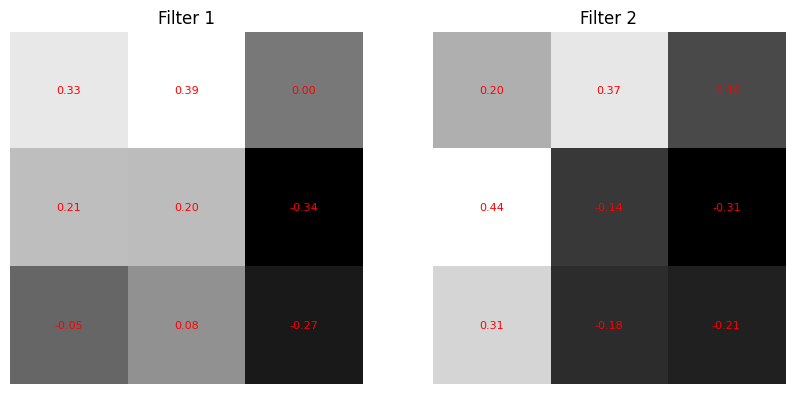

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]
ax.imshow(weights_init[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

ax = axes[1]
ax.imshow(weights_init[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [40]:
for i in range(2):
    mean = np.mean(weights_init[:, :, 0, i])
    variance = np.var(weights_init[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_init[i])
    variance = np.var(bias_init[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('6.txt', weights_init, bias_init, 'Before Training')
save_model_weights('6_weights.txt', weights_init, bias_init, 'Before Training')

Conv Layer 1 Weights:
Mean: 0.061544522643089294
Variance: 0.056063976138830185
Conv Layer 1 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: 0.040535733103752136
Variance: 0.07276397198438644
Conv Layer 2 Biases:
Mean: 0.0
Variance: 0.0
------------------------------


In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_full, y_full, epochs=10, callbacks=[WeightsCallback()])

Epoch 1/10
1823/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 9.7478
Epoch 1:
Weights:
[[[[ 0.0383924  -0.02233021]]

  [[ 0.11209961  0.1245484 ]]

  [[-0.01310476 -0.18445493]]]


 [[[ 0.01133383  0.17085437]]

  [[ 0.04410573 -0.11847664]]

  [[-0.10223569 -0.19893384]]]


 [[[-0.09292353  0.07228663]]

  [[ 0.02692039 -0.1495675 ]]

  [[-0.01272362 -0.09293635]]]]
Bias:
[-0.18918078 -0.36271048]
Loss: 3.6115047931671143
Saved parameters for epoch 1 to model_parameters\parameters_epoch_1.npz
Saved parameters for epoch 1
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7976 - loss: 9.5756
Epoch 2/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9268 - loss: 0.3452
Epoch 2:
Weights:
[[[[ 0.01260738  0.00289224]]

  [[ 0.04503503  0.04691412]]

  [[ 0.00076422 -0.11044599]]]


 [[[ 0.01238261  0.07449221]]

  [[ 0.01107964 -0.03141462]]

  [[-0.02668481 -0.16412728]]]


 [[[-0.0376589   0.02285845]]

  [[-0.00684707 -0.05176773]]

  [[ 0.00144807 -

In [42]:
weights_final=(model.layers[0].get_weights()[0])
bias_final=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_final}")
print(f"Bias:\n{bias_final}")

Weights:
[[[[-0.00343155  0.01273545]]

  [[ 0.02878741 -0.00498735]]

  [[ 0.01249722 -0.04043916]]]


 [[[-0.02842758  0.03635903]]

  [[ 0.02194781 -0.00316267]]

  [[-0.01327149 -0.03573151]]]


 [[[-0.07625375  0.00183946]]

  [[-0.04212296 -0.01811536]]

  [[ 0.00194239 -0.03971713]]]]
Bias:
[-0.01026036 -0.5552191 ]


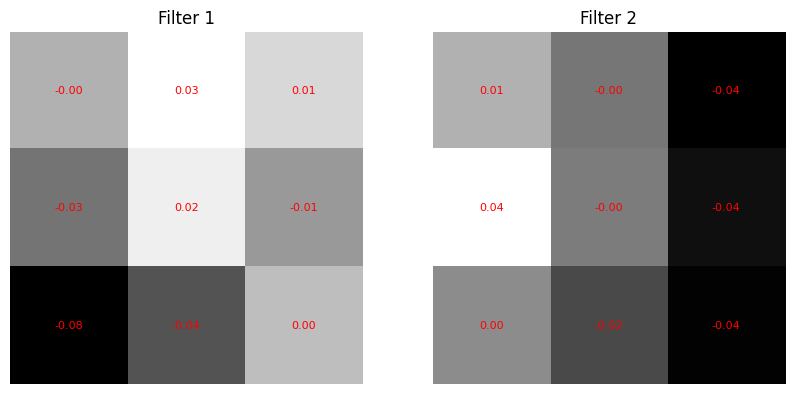

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
ax.imshow(weights_final[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
ax = axes[1]
ax.imshow(weights_final[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [44]:
for i in range(2):
    mean = np.mean(weights_final[:, :, 0, i])
    variance = np.var(weights_final[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_final[i])
    variance = np.var(bias_final[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('6.txt', weights_final, bias_final, 'After Training')
save_model_weights('6_weights.txt', weights_final, bias_final, 'After Training')
save_kernel_comparison_images('6.png', weights_init, weights_final)

Conv Layer 1 Weights:
Mean: -0.010925832204520702
Variance: 0.0009978915331885219
Conv Layer 1 Biases:
Mean: -0.010260357521474361
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: -0.01013546995818615
Variance: 0.000601729319896549
Conv Layer 2 Biases:
Mean: -0.5552191138267517
Variance: 0.0
------------------------------


In [45]:
test_loss, test_acc = model.evaluate(x_test_full, y_test_full)
print(f'Test accuracy: {test_acc}')
save_all_model_parameters('after_training', model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.1978
Test accuracy: 0.9613000154495239
Saved parameters for epoch after_training to model_parameters\parameters_epoch_after_training.npz


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


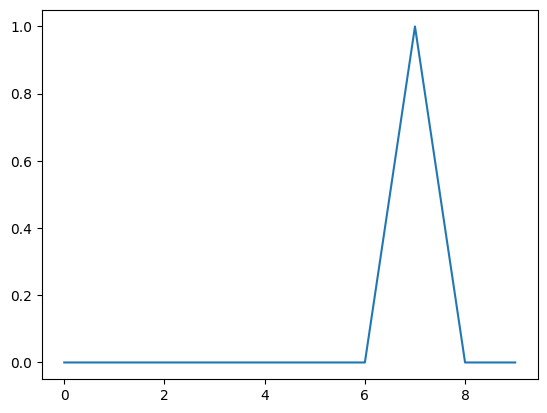

In [46]:
predictions = model.predict(x_test_full)
plt.plot((predictions[0])) 


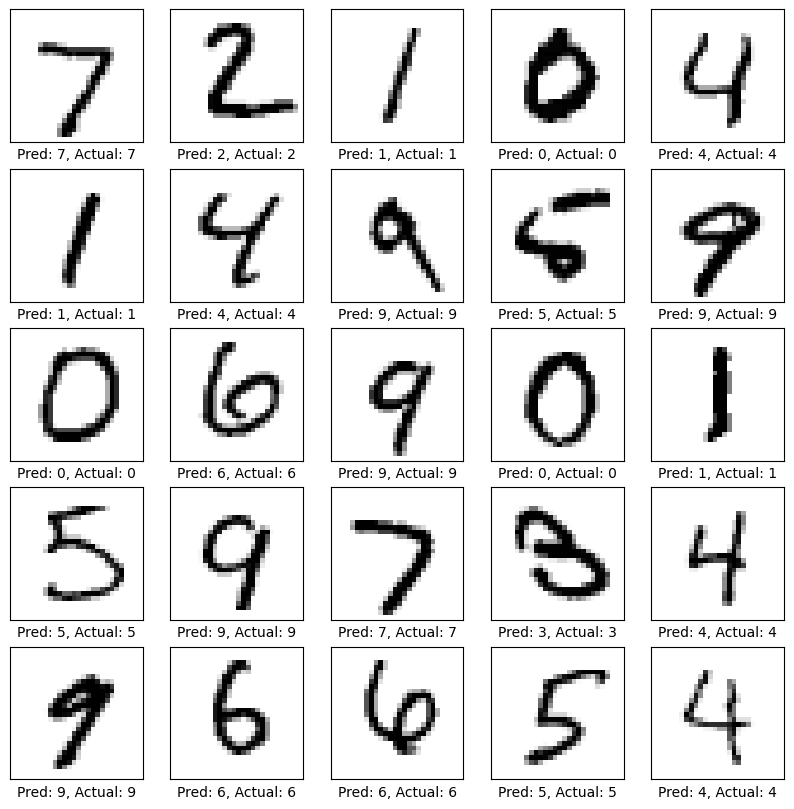

In [47]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_full[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test_full[i])}")
plt.show()


In [48]:

from scipy.signal import convolve2d

image = x_test_full[1]
image = image[:, :, 0]

kernel = weights_final[:,:,0,1]

print(kernel)
print(image.shape)

[[ 0.01273545 -0.00498735 -0.04043916]
 [ 0.03635903 -0.00316267 -0.03573151]
 [ 0.00183946 -0.01811536 -0.03971713]]
(28, 28)


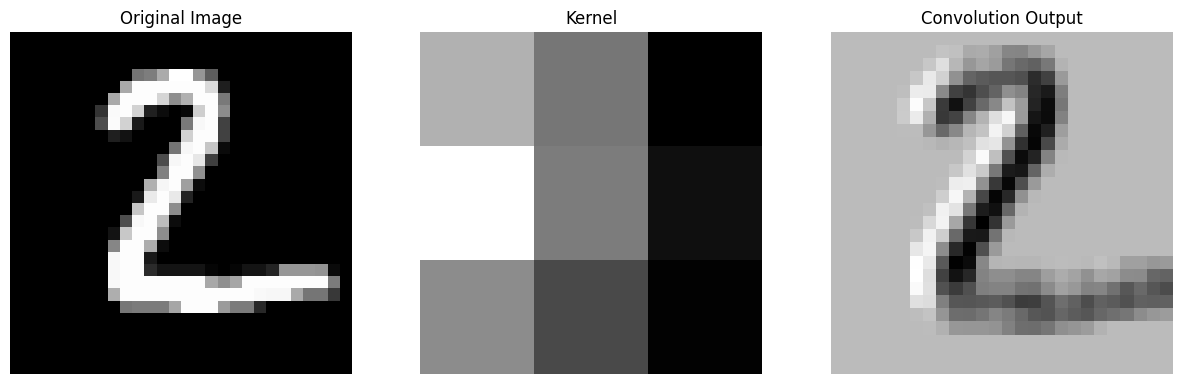

In [49]:


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()


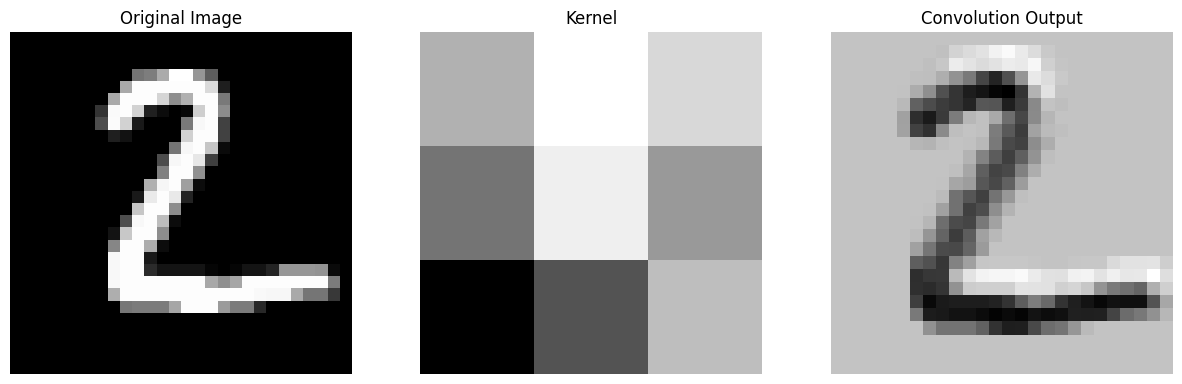

In [50]:
kernel = weights_final[:,:,0,0]


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        13,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,652 (158.80 KB)

 Trainable params: 13,550 (52.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,102 (105.87 KB)

In [53]:
#np.load()=> reads the .npz files
data = np.load('model_parameters/parameters_epoch_before_training.npz')

print(data.files)

for key in data:
    print(f"{key}: {data[key].shape}")
    print(data[key]) 

['arr_0', 'arr_1', 'arr_2', 'arr_3']
arr_0: (3, 3, 1, 2)
[[[[ 0.32745436  0.20183757]]

  [[ 0.3934023   0.36534193]]

  [[ 0.00441238 -0.09786722]]]


 [[[ 0.2056953   0.43710205]]

  [[ 0.19909361 -0.14429855]]

  [[-0.3392408  -0.3120576 ]]]


 [[[-0.04676974  0.31183186]]

  [[ 0.07719919 -0.1820727 ]]

  [[-0.2673459  -0.21499568]]]]
arr_1: (2,)
[0. 0.]
arr_2: (1352, 10)
[[-0.01350408  0.05990323  0.05828901 ...  0.0458791  -0.05285347
   0.02662394]
 [-0.0437794  -0.05265618  0.04550166 ...  0.0074237   0.02018043
   0.01697258]
 [ 0.00395309 -0.05896823  0.01288715 ...  0.04747714 -0.03170438
  -0.01459434]
 ...
 [ 0.0258544   0.02619705  0.02285913 ... -0.05359734 -0.03745397
  -0.04494038]
 [ 0.04637261 -0.00462637 -0.01435548 ... -0.01538108  0.05520579
   0.06077284]
 [ 0.03749619 -0.02498829 -0.00076264 ... -0.04074502  0.04849603
  -0.02210932]]
arr_3: (10,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
